/var/folders/zs/q57jlw697vzcd20zv4v890wm0000gn/T/ipykernel_98837/4270577178.py:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, max_display=30)


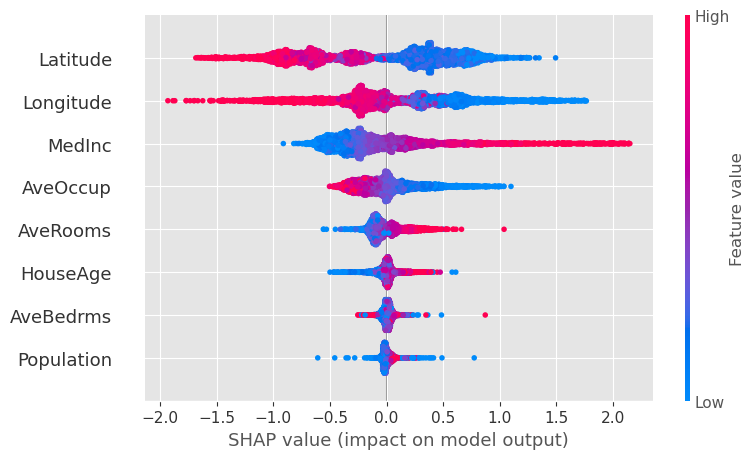

/var/folders/zs/q57jlw697vzcd20zv4v890wm0000gn/T/ipykernel_98837/4270577178.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(interaction_values, X_test, plot_type="compact_dot", max_display=30)
/opt/anaconda3/lib/python3.11/site-packages/shap/plots/_beeswarm.py:686: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  return summary_legacy(


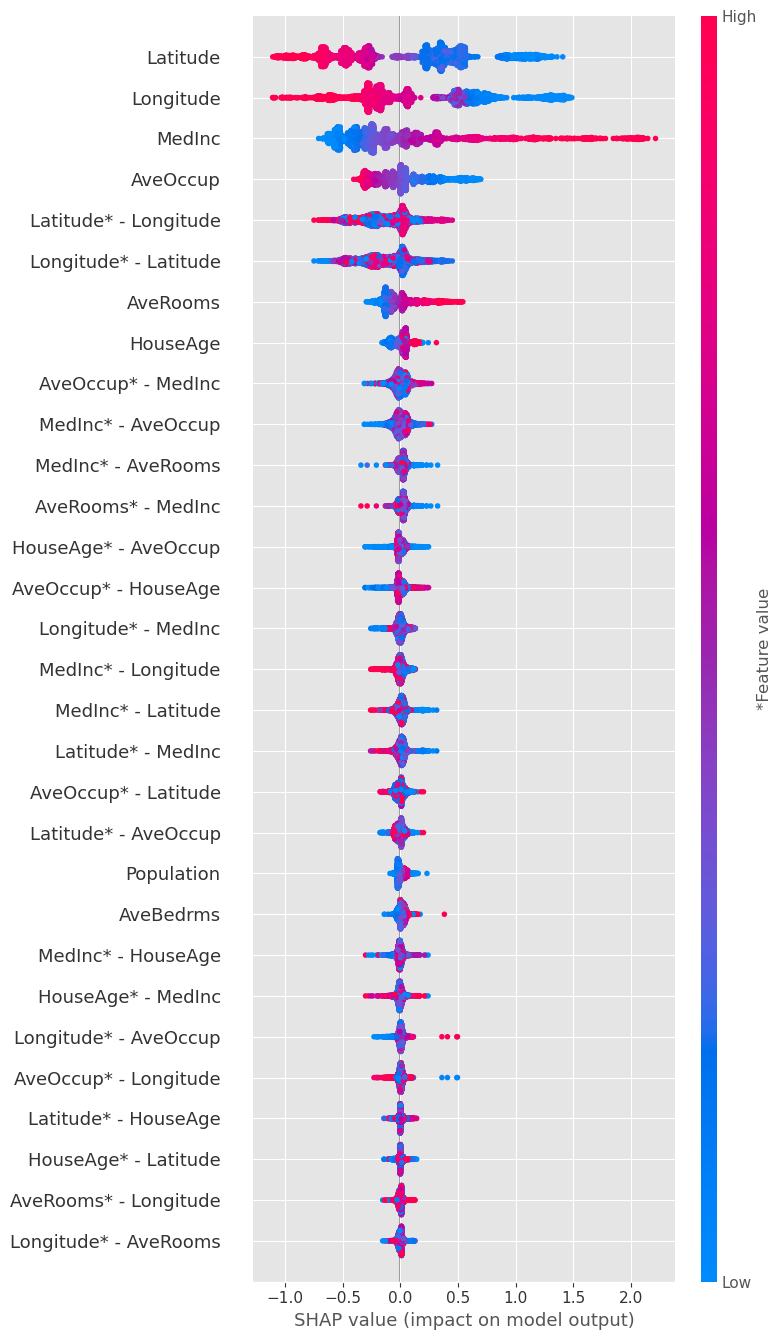

In [15]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# Load California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, max_depth=4)
model.fit(X_train, y_train)

# Compute SHAP interaction values
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=30)

interaction_values = explainer.shap_interaction_values(X_test)

# ---- 1. Global summary plot (top interactions) ----
# shap.summary_plot(interaction_values, X_test, max_display=10)
shap.summary_plot(interaction_values, X_test, plot_type="compact_dot", max_display=30)

# # ---- 2. Automatically find top 3 feature interaction pairs ----
# mean_interactions = np.abs(interaction_values).mean(axis=0)
# np.fill_diagonal(mean_interactions, 0)

# top_indices = np.dstack(np.unravel_index(
#     np.argsort(mean_interactions.ravel())[::-1],
#     mean_interactions.shape))[0]

# # ---- 3. Plot dependence plots for top 3 interactions ----
# for i, (feat_i, feat_j) in enumerate(top_indices[:3]):
#     print(f"Top {i+1} interaction: {X.columns[feat_i]} and {X.columns[feat_j]}")
#     shap.dependence_plot((feat_i, feat_j), interaction_values, X_test, interaction_index=feat_j)
